<a href="https://colab.research.google.com/github/csrsandeep/Data-Projects/blob/main/Weed_classification_with_VGG16_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np   #For efficient numerical operations and array manipulations in Python.
import matplotlib.pyplot as plt  #library for data visualization.
import seaborn as sns     #statistical data visualization
import os  #accessing files and directories.
import cv2  #for image processing and computer vision tasks.
import io   # for working with input/output operations.
from tqdm import tqdm #for creating progress bars during iterations and loops to track the progress of tasks.
import glob #to retrieve files/pathnames that match a specified pattern.
import tensorflow as tf #a popular open-source framework for deep learning
import random #for generating random numbers
from google.colab import drive  #allows for accessing and interacting with files in Google Drive
from sklearn.model_selection import train_test_split  #to split data into training and testing subsets.
from tensorflow.keras.utils import to_categorical #for one-hot encoding categorical labels.


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/dataset'
files = os.listdir(folder_path)
for file in files:
    print(file)


grass
soybean
soil
broadleaf


In [ ]:
# Define the class labels
class_labels = ['grass','soybean',  'soil', 'broadleaf']

In [ ]:
# Initialize lists to store images (X) and labels (Y)
X = []
Y = []

In [ ]:
# Iterate over the class folders
for label_idx, label in enumerate(class_labels):
    class_folder_path = os.path.join(folder_path, label)

    # Iterate over the images in the class folder
    for image_file in os.listdir(class_folder_path):
        image_path = os.path.join(class_folder_path, image_file)

        # Read the image
        image = cv2.imread(image_path)

        # Resize the image to a consistent size
        resized_image = cv2.resize(image, (227, 227))  # Adjust the dimensions as needed

        # Append the resized image to the X list
        X.append(resized_image)

        # Append the corresponding label to the Y list
        Y.append(label_idx)  # Use the index of the class label as the label value

In [ ]:
# Convert the lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Perform one-hot encoding on the labels
Y = to_categorical(Y, num_classes=len(class_labels))

# Print the shapes of the image data (X) and label data (Y)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (15386, 227, 227, 3)
Y shape: (15386, 4)


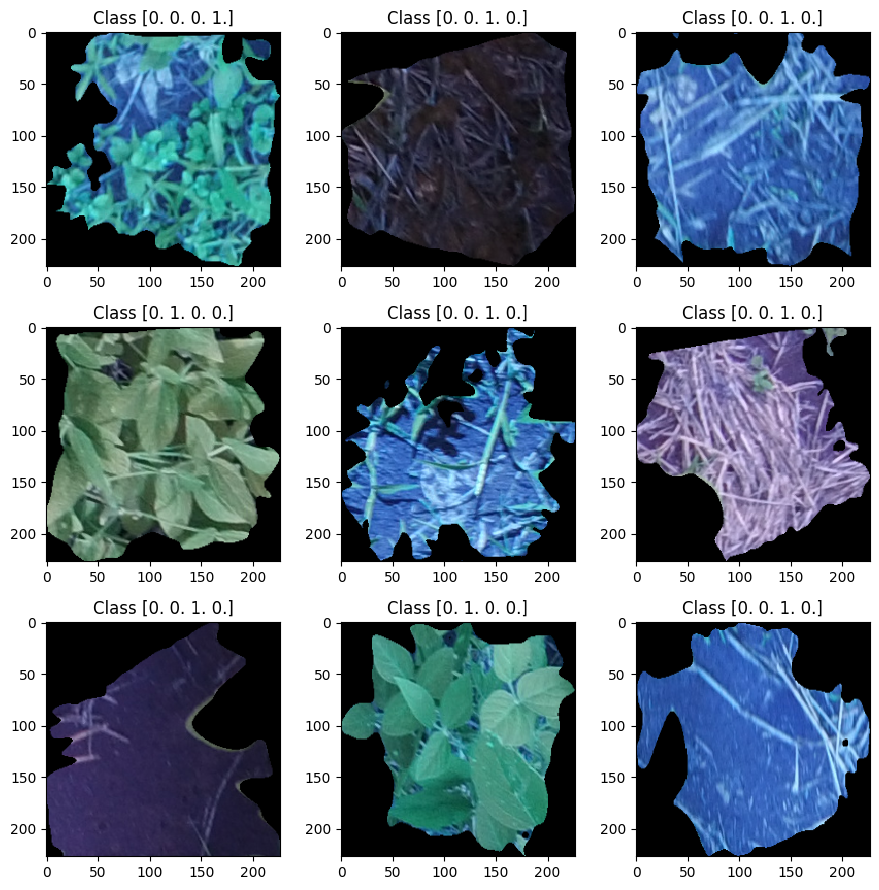

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X))
    plt.imshow(X[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y[num]))

plt.tight_layout()

In [ ]:

# Split the data into training and temporary sets
X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the temporary data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=0.2, random_state=42)

# Print the shapes of the training, validation, and test sets
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_val shape:', X_val.shape)
print('Y_val shape:', Y_val.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (9846, 227, 227, 3)
Y_train shape: (9846, 4)
X_val shape: (2462, 227, 227, 3)
Y_val shape: (2462, 4)
X_test shape: (3078, 227, 227, 3)
Y_test shape: (3078, 4)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                              

In [ ]:
history=model.fit(X_train,Y_train, validation_data=(X_val,Y_val), epochs=10, batch_size=150, verbose=1)

Epoch 1/10
66/66 [==============================] - 406s 6s/step - loss: 0.2126 - accuracy: 0.9326 - val_loss: 0.0723 - val_accuracy: 0.9764
Epoch 2/10
66/66 [==============================] - 405s 6s/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.0527 - val_accuracy: 0.9817
Epoch 3/10
66/66 [==============================] - 406s 6s/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 4/10
66/66 [==============================] - 405s 6s/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0458 - val_accuracy: 0.9842
Epoch 5/10
66/66 [==============================] - 406s 6s/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.0656 - val_accuracy: 0.9789
Epoch 6/10
66/66 [==============================] - 406s 6s/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 7/10
66/66 [==============================] - 404s 6s/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0492 - val_accuracy: 0.9854
Epoch 8/10
66

Model Accuracy



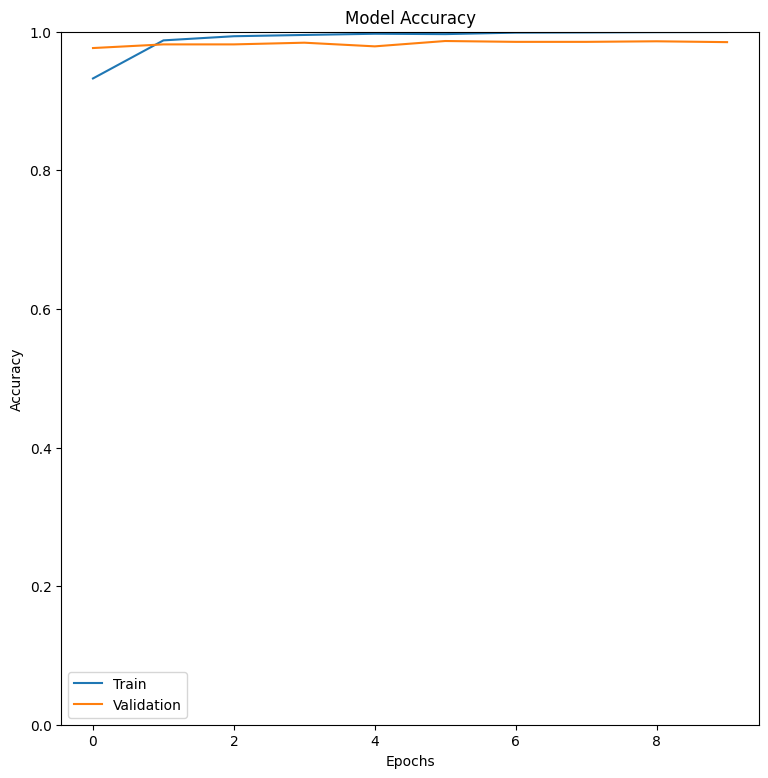

In [ ]:
ax=plt.gca()
ax.set_ylim([0,1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()

Model Loss



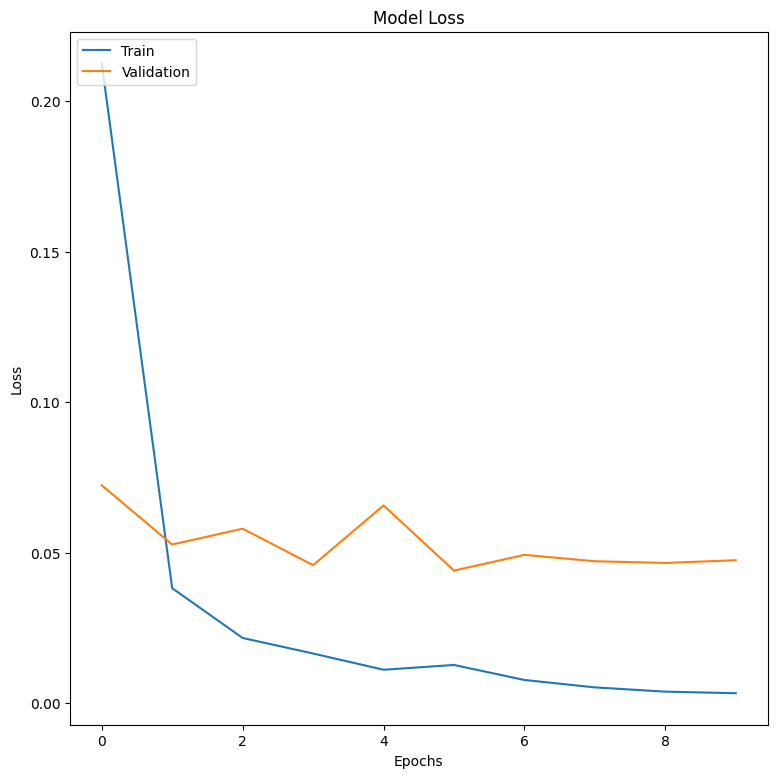

In [ ]:
ax=plt.gca()

print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

97/97 [==============================] - 104s 1s/step - loss: 0.0427 - accuracy: 0.9883
Test Loss: 0.042733583599328995
Test Accuracy: 0.988304078578949


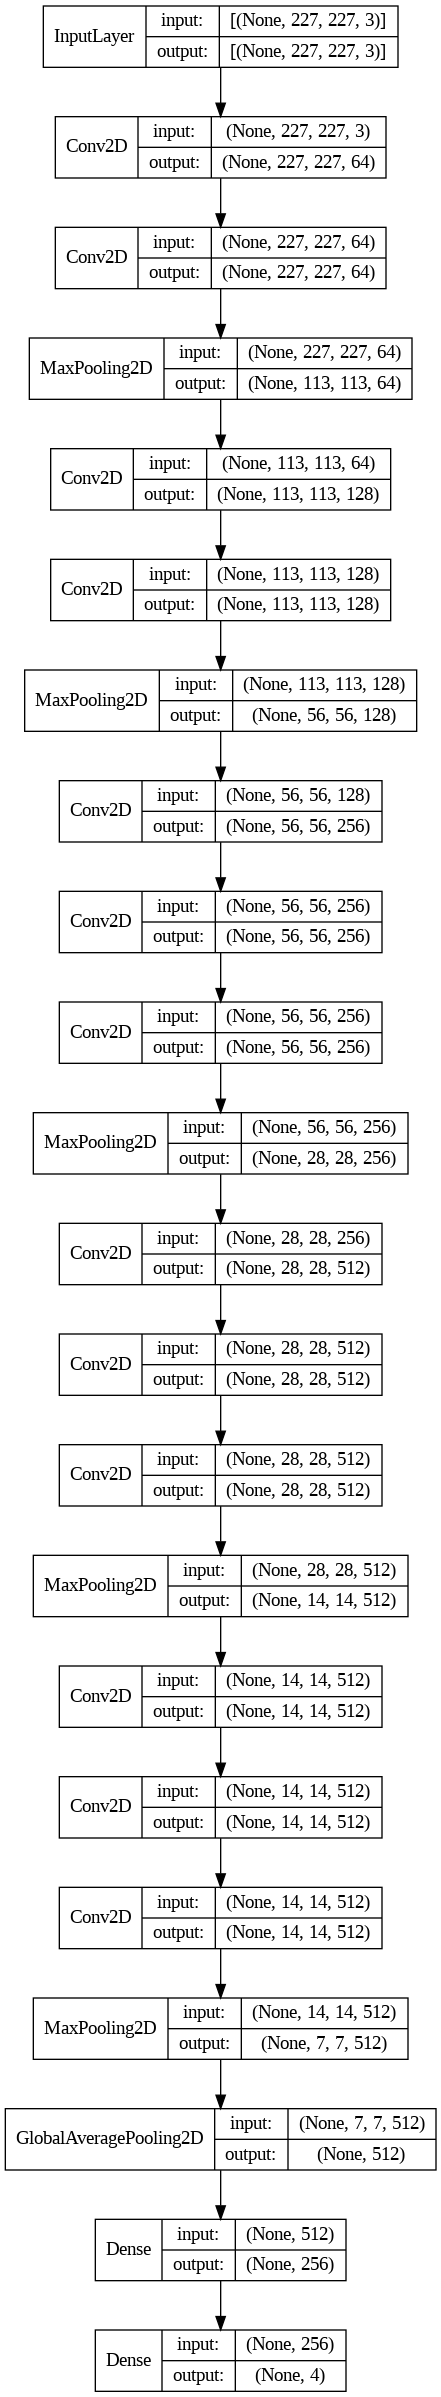

In [ ]:
import tensorflow
tensorflow.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)
